In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [4]:
df = pd.DataFrame(data)

In [5]:
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]

In [6]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [7]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)

In [8]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Milk, Potato)"
8,0.500000,"(Burger, Onion, Potato)"


In [9]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [10]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,0.083333,inf
7,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
8,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333
9,(Burger),"(Onion, Potato)",0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333


In [11]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
6,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf


In [12]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [13]:
retail = pd.DataFrame(retail_shopping_basket)

In [14]:
retail = retail[['ID', 'Basket']]

In [15]:
pd.options.display.max_colwidth=100

In [16]:
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [17]:
retail = retail.drop('Basket' ,1).join(retail.Basket.str.join(',').str.get_dummies(','))

In [18]:
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [19]:
frequent_itemsets_2 = apriori(retail.drop('ID',1), use_colnames=True)

In [20]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [21]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,0.166667,2.000000
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,0.166667,inf


In [22]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,0.166667,inf


In [25]:
movies = pd.read_csv('movies.csv')

In [27]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [28]:
movies_ohe = movies.drop('genres',1).join(movies.genres.str.get_dummies())

In [29]:
pd.options.display.max_columns=100

In [30]:
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
stat1 = movies_ohe.drop(['title', 'movieId'],1).apply(pd.value_counts)

In [32]:
stat1 = stat1.transpose().drop(0,1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})

In [33]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})

In [34]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId',1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

In [35]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

In [36]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [37]:
stat

,No. of movies,No. of movies with only 1 genre
Drama,25606,9056
Comedy,16870,5674
Thriller,8654,919
Romance,7719,278
Action,7348,562
Horror,5989,1661
Documentary,5605,4731
Crime,5319,218
(no genres listed),5062,5062
Adventure,4145,243


Text(0.5, 1.0, 'distribution of number of genres')

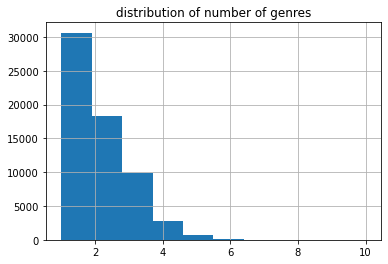

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [39]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [40]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)

In [41]:
frequent_itemsets_movies

,support,itemsets
0,0.081092,((no genres listed))
1,0.117713,(Action)
2,0.066402,(Adventure)
3,0.046922,(Animation)
4,0.047018,(Children)
5,0.270253,(Comedy)
6,0.085209,(Crime)
7,0.089791,(Documentary)
8,0.410201,(Drama)
9,0.043750,(Fantasy)


In [42]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [43]:
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Action),(Adventure),0.117713,0.066402,0.026465,0.224823,3.385798,0.018648,1.204368
1,(Adventure),(Action),0.066402,0.117713,0.026465,0.398552,3.385798,0.018648,1.466939
2,(Action),(Thriller),0.117713,0.138635,0.035388,0.300626,2.168474,0.019068,1.231623
3,(Thriller),(Action),0.138635,0.117713,0.035388,0.255258,2.168474,0.019068,1.184688
4,(Romance),(Comedy),0.123656,0.270253,0.055268,0.446949,1.653818,0.021850,1.319493
5,(Comedy),(Romance),0.270253,0.123656,0.055268,0.204505,1.653818,0.021850,1.101633
6,(Crime),(Drama),0.085209,0.410201,0.047995,0.563264,1.373140,0.013042,1.350469
7,(Drama),(Crime),0.410201,0.085209,0.047995,0.117004,1.373140,0.013042,1.036008
8,(Crime),(Thriller),0.085209,0.138635,0.033081,0.388231,2.800385,0.021268,1.407991
9,(Thriller),(Crime),0.138635,0.085209,0.033081,0.238618,2.800385,0.021268,1.201488


In [44]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Adventure),(Action),0.066402,0.117713,0.026465,0.398552,3.385798,0.018648,1.466939
4,(Romance),(Comedy),0.123656,0.270253,0.055268,0.446949,1.653818,0.021850,1.319493
6,(Crime),(Drama),0.085209,0.410201,0.047995,0.563264,1.373140,0.013042,1.350469
8,(Crime),(Thriller),0.085209,0.138635,0.033081,0.388231,2.800385,0.021268,1.407991
10,(Romance),(Drama),0.123656,0.410201,0.074556,0.602928,1.469834,0.023832,1.485369
13,(Horror),(Thriller),0.095942,0.138635,0.034939,0.364168,2.626813,0.021638,1.354705


In [45]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [46]:
pd.options.display.max_rows=50

In [47]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
55,56,Kids of the Round Table (1995),Adventure|Children|Comedy|Fantasy
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
105,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
...,...,...,...
62013,207556,Krakonoš a lyžníci (1981),Adventure|Children|Comedy
62028,207614,Os Saltimbancos Trapalhões (1981),Adventure|Children|Comedy
62029,207616,Os Trapalhões no Reino da Fantasia (1985),Adventure|Children|Comedy|Fantasy
62032,207622,A Princesa Xuxa e os Trapalhões (1989),Adventure|Children|Comedy|Sci-Fi
